In [8]:
# download the dataset
# %pip install -q tf_keras
# %pip install opencv-contrib-python

     --------------------------------------- 45.3/45.3 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\PC\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
from deepface import DeepFace

import cv2
import matplotlib.pyplot as plt

In [ ]:
class facial_area():
    def __init__(self):
        self.x = 0
        self.y = 0
        self.width = 0
        self.height = 0

    def __init__(self, tar):
        self.x = tar["x"]
        self.y = tar["y"]
        self.width = tar["w"]
        self.height = tar["h"]

    def set(self, tar):
        self.x = tar["x"]
        self.y = tar["y"]
        self.width = tar["w"]
        self.height = tar["h"]

class facial_simlarity_checker():
    def __init__(self):
        self.model = DeepFace.build_model("Facenet")
        self.img1 = ""
        self.img2 = ""
        self.img1_area = facial_area()
        self.img2_area = facial_area()
    
    def load_image(self, img1, img2):
        self.img1 = img1
        self.img2 = img2
    
    def check_similarity(self, img1=None, img2=None):
        if img1 == None or img2 == None:
            img1 = self.img1
            img2 = self.img2
        else:
            self.load_image(img1, img2)

        try :
            img1 = cv2.imread(img1)
            img2 = cv2.imread(img2)
        except:
            print("The image path is not correct")
            return -1
        
        img1 = cv2.imread(img1)
        img2 = cv2.imread(img2)

        result = DeepFace.verify(img1, img2, model_name = "Facenet", model = self.model)
        self.img1_area.set(result["facial_areas"]["img1"])
        self.img2_area.set(result["facial_areas"]["img2"])

        return result["distance"]

    def show_image(self, img):
        img = cv2.imread(img)
        if (self.img1 == img):
            img = cv2.rectangle(img, (self.img1_area.x, self.img1_area.y), (self.img1_area.x + self.img1_area.width, self.img1_area.y + self.img1_area.height), (0, 255, 0), 2)
        else:
            img = cv2.rectangle(img, (self.img2_area.x, self.img2_area.y), (self.img2_area.x + self.img2_area.width, self.img2_area.y + self.img2_area.height), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

    def show_result(self, img1, img2):
        result = self.check_similarity(img1, img2)
        print("The similarity between the images is: ", result)
        self.show_image(img1)
        self.show_image(img2)

{'verified': False, 'distance': 0.8901513760249178, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 524, 'y': 810, 'w': 467, 'h': 467, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 50, 'y': 33, 'w': 165, 'h': 165, 'left_eye': (165, 98), 'right_eye': (99, 98)}}, 'time': 1.54}
Facial area:  50 33 165 165


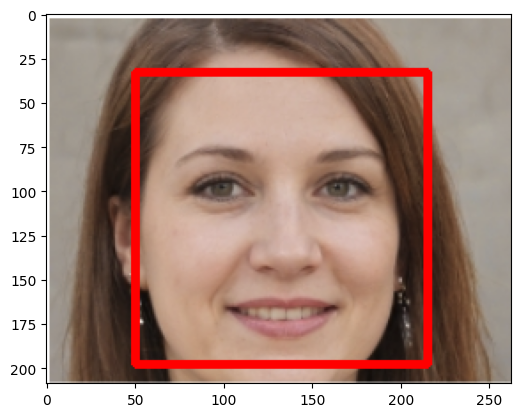

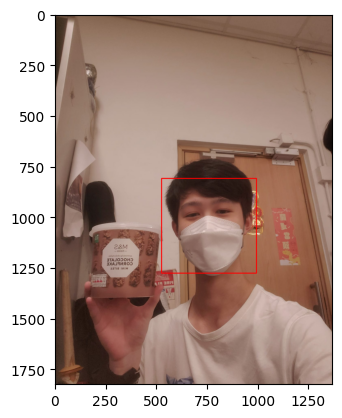

In [12]:

result = DeepFace.verify(img1_path = "img/mymask_cup.jpg", img2_path = "img/image1.png")

print(result)

# get face detection result

# print the image with face detection result with openCv
facial_area = result["facial_areas"]["img2"]
img1 = cv2.imread("img/image1.png")
img1 = cv2.rectangle(img1, (facial_area["x"], facial_area["y"]), (facial_area["x"]+facial_area["w"], facial_area["y"]+facial_area["h"]), (0, 0, 255), 3)
print("Facial area: ", facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

facial_area = result["facial_areas"]["img1"]
img2 = cv2.imread("img/mymask_cup.jpg")
img2 = cv2.rectangle(img2, (facial_area["x"], facial_area["y"]), (facial_area["x"]+facial_area["w"], facial_area["y"]+facial_area["h"]), (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
